**A decision tree for solving the flag training dataset provided by UCI**
- https://archive.ics.uci.edu/ml/datasets/Flags

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
# Analyze the data
flags = pd.read_csv("flags.csv", header = 0)
print(flags.head())
print(flags.columns)

             Name  Landmass  Zone  Area  ...  Animate  Text  Topleft  Botright
0     Afghanistan         5     1   648  ...        0     0    black     green
1         Albania         3     1    29  ...        1     0      red       red
2         Algeria         4     1  2388  ...        0     0    green     white
3  American-Samoa         6     3     0  ...        1     0     blue       red
4         Andorra         3     1     0  ...        0     0     blue       red

[5 rows x 30 columns]
Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')


In [3]:
# define label set
labels = flags[["Landmass"]]
print(labels)

# define features set
data = flags[["Red","Green","Blue","Gold","White","Black","Orange"]]

     Landmass
0           5
1           3
2           4
3           6
4           3
..        ...
189         6
190         3
191         4
192         4
193         4

[194 rows x 1 columns]


In [4]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state = 1)

print(X_train, X_test, y_train, y_test)

     Red  Green  Blue  Gold  White  Black  Orange
107    1      1     0     1      0      0       0
42     1      0     1     0      1      0       0
17     1      1     1     1      1      1       1
5      1      0     0     1      0      1       0
117    1      1     0     0      0      0       0
..   ...    ...   ...   ...    ...    ...     ...
133    1      0     1     0      1      0       0
137    1      0     1     1      1      0       0
72     0      0     1     0      1      0       0
140    1      0     1     0      1      0       0
37     1      0     0     1      0      0       0

[145 rows x 7 columns]      Red  Green  Blue  Gold  White  Black  Orange
44     0      1     0     1      1      0       0
172    1      0     0     0      1      0       0
163    1      1     0     1      1      0       0
35     1      0     1     1      0      0       0
136    1      0     0     0      1      0       0
11     1      0     0     0      1      0       0
123    1      0     1     

In [5]:
# Building and training the model
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(X_train, y_train)

# Score model
print(f"model1 score: {tree.score(X_test, y_test)}")

model1 score: 0.3469387755102041


In [6]:
# Analyzing the cause of low accuracy
scores = []
for i in range(1,21):
  tree2 = DecisionTreeClassifier(random_state = 1, max_depth = i)
  tree2.fit(X_train, y_train)
  score = tree2.score(X_test, y_test)
  print(f"model=model2, i={i}, score={score}")
  scores.append(score)

model=model2, i=1, score=0.3469387755102041
model=model2, i=2, score=0.22448979591836735
model=model2, i=3, score=0.3469387755102041
model=model2, i=4, score=0.32653061224489793
model=model2, i=5, score=0.3469387755102041
model=model2, i=6, score=0.3469387755102041
model=model2, i=7, score=0.3469387755102041
model=model2, i=8, score=0.3469387755102041
model=model2, i=9, score=0.3469387755102041
model=model2, i=10, score=0.3469387755102041
model=model2, i=11, score=0.3469387755102041
model=model2, i=12, score=0.3469387755102041
model=model2, i=13, score=0.3469387755102041
model=model2, i=14, score=0.3469387755102041
model=model2, i=15, score=0.3469387755102041
model=model2, i=16, score=0.3469387755102041
model=model2, i=17, score=0.3469387755102041
model=model2, i=18, score=0.3469387755102041
model=model2, i=19, score=0.3469387755102041
model=model2, i=20, score=0.3469387755102041


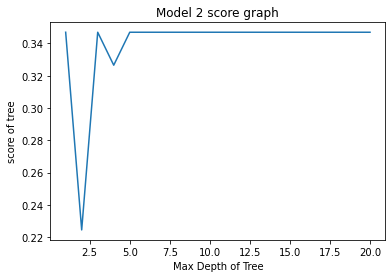

In [7]:
# Graph model 2
plt.plot(range(1,21), scores)
plt.xlabel("Max Depth of Tree")
plt.ylabel("score of tree")
plt.title("Model 2 score graph")
plt.show()

In [8]:
# Improve the model with more data
# Building new dataset
data2 = flags[["Red", "Green", "Blue", "Gold",
 "White", "Black", "Orange",
 "Circles",
"Crosses","Saltires","Quarters","Sunstars",
"Crescent","Triangle"]]

labels2 = flags[["Landmass"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, labels2, random_state = 1)

scores2 = []
for i in range(1,21):
  tree3 = DecisionTreeClassifier(random_state = 1, max_depth = i)
  tree3.fit(X_train2, y_train2)
  score = tree3.score(X_test2, y_test2)
  print(f"model=model3, i={i}, score={score}")
  scores2.append(score)

model=model3, i=1, score=0.3469387755102041
model=model3, i=2, score=0.3877551020408163
model=model3, i=3, score=0.5102040816326531
model=model3, i=4, score=0.5510204081632653
model=model3, i=5, score=0.5510204081632653
model=model3, i=6, score=0.5102040816326531
model=model3, i=7, score=0.42857142857142855
model=model3, i=8, score=0.4489795918367347
model=model3, i=9, score=0.4489795918367347
model=model3, i=10, score=0.4489795918367347
model=model3, i=11, score=0.4489795918367347
model=model3, i=12, score=0.4489795918367347
model=model3, i=13, score=0.4489795918367347
model=model3, i=14, score=0.4489795918367347
model=model3, i=15, score=0.4489795918367347
model=model3, i=16, score=0.4489795918367347
model=model3, i=17, score=0.4489795918367347
model=model3, i=18, score=0.4489795918367347
model=model3, i=19, score=0.4489795918367347
model=model3, i=20, score=0.4489795918367347


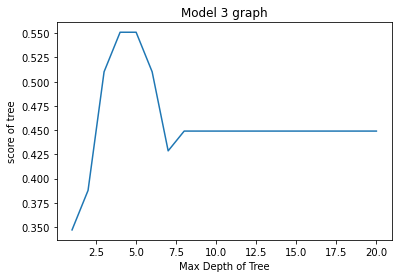

In [10]:
# Graph final data
plt.plot(range(1,21), scores2)
plt.xlabel("Max Depth of Tree")
plt.ylabel("score of tree")
plt.title("Model 3 graph")
plt.show()